# HuggingFace Data

In [35]:
import pyarrow.parquet as pq
import pandas as pd

import ast
from PIL import Image
import io

import matplotlib.pyplot as plt
from tqdm import tqdm


## extracting from parquet format

In [25]:
# Read the Parquet file into an Arrow table
table = pq.read_table('train-00005-of-00006-f997fa67e264f7a6.parquet')

# Convert the table to a Pandas DataFrame
df = table.to_pandas()

# Write the DataFrame to a CSV file
df.to_csv('huggingface_riffusion_mono_6.csv', index=False)

## read dataframe

In [2]:
import ast
from PIL import Image
import io

# Assuming your dataframe is called 'df'
def get_image_from_bytes(byte_string):
    # Convert byte string to image data
    img = Image.open(io.BytesIO(byte_string))
    return img

def get_image(row):
    # Get the byte string from the 'image' column
    byte_string = ast.literal_eval(row['image'])['bytes']
    # Convert the byte string to an image and return it
    return get_image_from_bytes(byte_string)

In [3]:
# read all the data
df_mono_1 = pd.read_csv('hugging_face_bytes/huggingface_riffusion_mono_1.csv')
df_mono_2 = pd.read_csv('hugging_face_bytes/huggingface_riffusion_mono_2.csv')
df_mono_3 = pd.read_csv('hugging_face_bytes/huggingface_riffusion_mono_3.csv')
df_mono_4 = pd.read_csv('hugging_face_bytes/huggingface_riffusion_mono_4.csv')
df_mono_5 = pd.read_csv('hugging_face_bytes/huggingface_riffusion_mono_5.csv')
df_mono_6 = pd.read_csv('hugging_face_bytes/huggingface_riffusion_mono_6.csv')

df_stereo = pd.read_csv('hugging_face_bytes/huggingface_riffusion_stereo.csv')

In [4]:
# concatenate the mono dataframes
df_mono = pd.concat([df_mono_1, df_mono_2, df_mono_3, df_mono_4, df_mono_5, df_mono_6])

In [31]:
img = get_image(df_mono.iloc[0])

# check the type of the image
#print(type(img))

# it is a <class 'PIL.PngImagePlugin.PngImageFile'> object

# save to jpg
img.save('test.jpg', 'JPEG')

Save the images

In [36]:
# save all images to jpg
# one folder for mono and one for stereo
# The names are "hugging_face_images/mono" and "hugging_face_images/stereo"

# save all mono images
for i in tqdm(range(len(df_mono))):
    img = get_image(df_mono.iloc[i])
    img.save('hugging_face_images/mono/image_' + str(i) + '.jpg', 'JPEG')

100%|██████████| 20588/20588 [02:30<00:00, 136.90it/s]


In [37]:
# save all stereo images
for i in tqdm(range(len(df_stereo))):
    img = get_image(df_stereo.iloc[i])
    img.save('hugging_face_images/stereo/image_' + str(i) + '.jpg', 'JPEG')

100%|██████████| 5464/5464 [00:59<00:00, 91.70it/s] 


Save the whole dataframe with the text as well

In [7]:
# create a new dataframe, where the image column is replaced by the image itself
df_image_mono = df_mono.copy()
df_image_mono['image'] = df_image_mono.apply(get_image, axis=1)

In [8]:
# create a new dataframe, where the image column is replaced by the image itself
df_image_stereo = df_stereo.copy()
df_image_stereo['image'] = df_image_stereo.apply(get_image, axis=1)

In [9]:
# save the dataframes as csv files
df_image_mono.to_csv('hugging_face_data/data_mono.csv', index=False)
df_image_stereo.to_csv('hugging_face_data/data_stereo.csv', index=False)

In [10]:
df_image_mono.shape

(20588, 2)

In [33]:
df_image_stereo.shape

(5464, 2)

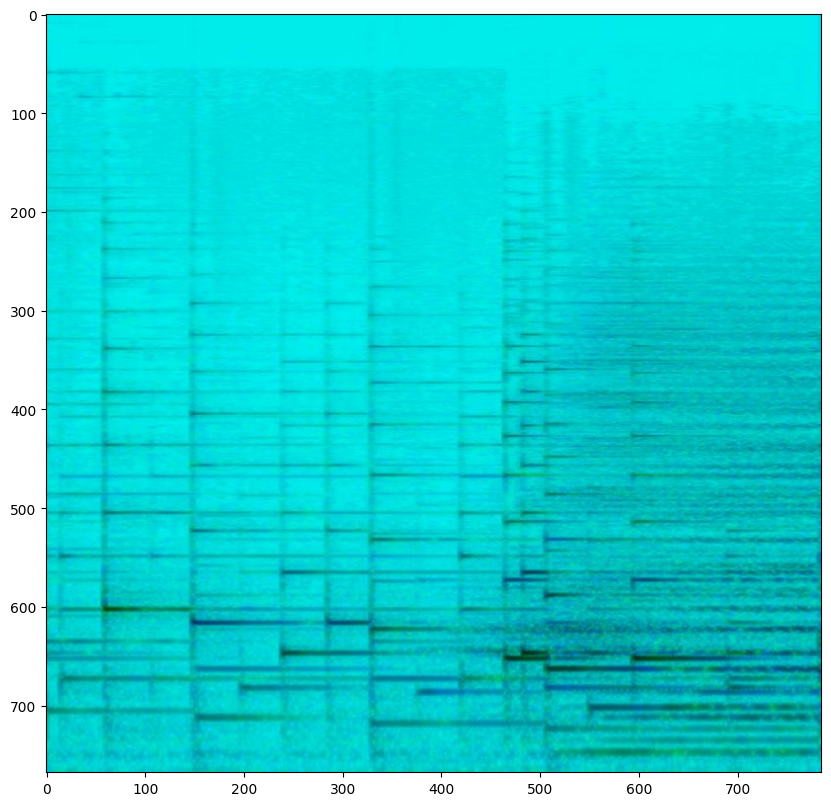

In [47]:
# plot the firts image from the stereo dataframe
idx = 0
plt.figure(figsize=(10, 10))
plt.imshow(df_image_stereo.iloc[idx]['image'])
plt.show()

In [48]:
# for the same idx, get the text and get the mono images with the same text, and plot them
text = df_image_stereo.iloc[idx]['text']
print(text)

The low quality recording features a ballad song that contains sustained strings, mellow piano melody and soft female vocal singing over it. It sounds sad and soulful, like something you would hear at Sunday services.


In [49]:
# get the mono images with the same text
mono_images = df_image_mono[df_image_mono['text'] == text]['image']
mono_images.shape

(4,)

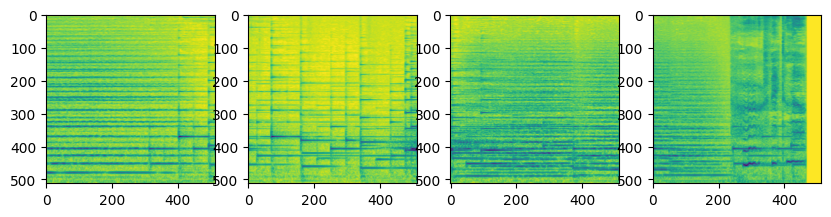

In [50]:
# there are 4 mono images with the same text
# plot them
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(mono_images.iloc[i])
plt.show()